### Project 2: Facial Recognition using Eigenfaces
#### Objective: A conceptual project to understand the Eigenfaces concept. 
#### Technique: Load multiple grayscale face images, flatten each into a vector, stack them into a matrix, find the eigenvectors of the covariance matrix, and visualize the top few eigenvectors as "eigenfaces." 

##### Step 1: Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

# os - Work with folders and files


##### Step 2: Load all grayscale face images from a folder

In [ ]:
folder_path = "faces"

# List of image filenames
# image_names = ['1.pgm','2.pgm','3.pgm','4.pgm','5.pgm','6.pgm','7.pgm','8.pgm','9.pgm','10.pgm']

# # Load each image directly
# for filename in image_names:
#     img = Image.open(filename).convert('L')   # Open image and convert to grayscale
#     img = img.resize((100, 100))              # Resize for uniformity
#     images.append(np.array(img))              # Convert to NumPy array and add to list

# Empty list to store image arrays
images = []

# Load each image directly
for filename in os.listdir(folder_path):
    if filename.endswith(".pgm") or filename.endswith(".jpg") or filename.endswith(".png"):
        img_path = os.path.join(folder_path, filename)   # combine folder + filename - faces\1.pgm
        img = Image.open(img_path).convert('L')          # convert to grayscale
        img = img.resize((100, 100))                     # resize for uniformity
        images.append(np.array(img))   

# Convert to NumPy array
data = np.array([img.flatten() for img in images])
print("Data shape:", data.shape)  # (num_images, 10000)

# .convert('L') → converts to grayscale (1 channel).
# .resize((100, 100)) → makes every image 100×100 pixels so that shapes match.
# Each image is stored as a NumPy array (matrix of pixel values)
# Each image (100×100) is flattened into a 1D vector of length 10,000.
# if you have 10 images, shape = (10, 10000)
# → meaning 10 samples, each having 10,000 pixel features.

Data shape: (10, 10000)


##### Step 3: Compute Mean Face and Center Data

In [3]:
mean_face = np.mean(data, axis=0)
centered_data = data - mean_face  # subtract mean to center data

# The mean face is the average of all faces pixel-by-pixel.
# Subtracting it centers the data around zero
# It removes common features (lighting, background) to highlight variations

##### Step 4: Compute Covariance Matrix and Eigen Decomposition

In [4]:
cov_matrix = np.cov(centered_data, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# calculate how pixel values vary together → covariance matrix.
# This matrix helps PCA(principal component analysis) find directions (patterns) of maximum variation
# rowvar=False - When doing PCA, we need the covariance matrix to describe relationships between features, not between rows
# Which pixel combinations carry the most information
# Each eigenvector = an Eigenface, a pattern of variation in the faces.
# Each eigenvalue = how important that Eigenface is (variance captured)
# np.linalg.eigh() finds eigenvalues and eigenvectors

# Sort eigenvectors by descending eigenvalues
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# PCA finds eigenvectors (directions of most variation).
# Keeps the most important axes (those with largest eigenvalues) first.
# [::-1] → reverses that order to descending
# [:, sorted_indices] - : → means “all rows” (i.e., the full eigenvector values), sorted_indices → selects columns in the new order

# Take top 6 eigenfaces
top_k = 6
top_eigenfaces = eigenvectors[:, :top_k]

# Take only the first 6 eigenvectors
# These top components preserve the most important information —the rest can be discarded to compress the image


##### Step 5: Visualize Mean Face and Eigenfaces

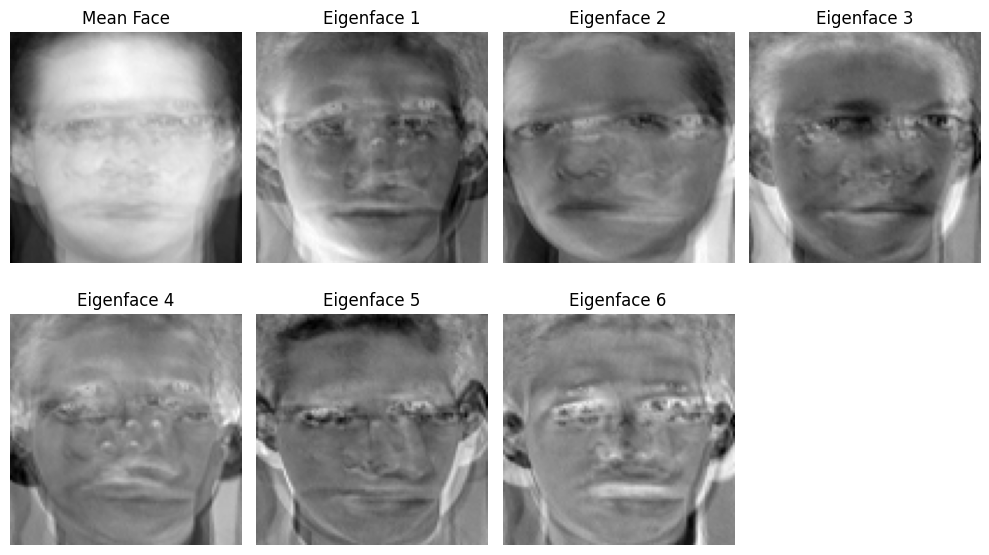

In [5]:
plt.figure(figsize=(10, 6))

# Mean face
plt.subplot(2, 4, 1) # rows, columns and position
plt.imshow(mean_face.reshape(100, 100), cmap='gray') # .reshape(100, 100) turns it back into a 2D image shape
plt.title("Mean Face")
plt.axis('off')

# These 6 eigenvectors are reshaped back into 100×100 “face-like” patterns
# Each eigenface highlights unique variations (like lighting, smile, nose shape, etc.).

# Top eigenfaces
for i in range(top_k):
    plt.subplot(2, 4, i + 2) # divides your figure into a grid of 2 rows and 4 columns (total 8 plots).
                             # The first position (1) is already used by the Mean Face,so we start from position 2 to plot Eigenface 1
    plt.imshow(top_eigenfaces[:, i].reshape(100, 100), cmap='gray') # .reshape(100, 100) turns it back into a 2D image shape
    plt.title(f"Eigenface {i + 1}") # cmap='gray' displays it in grayscale
    plt.axis('off')
# Loops through the top eigenfaces you selected (6 of them), i goes from 0 to 5 (if top_k = 6).

plt.tight_layout()
plt.show()

##### Step 6: Reconstruct first image using only top K eigenfaces

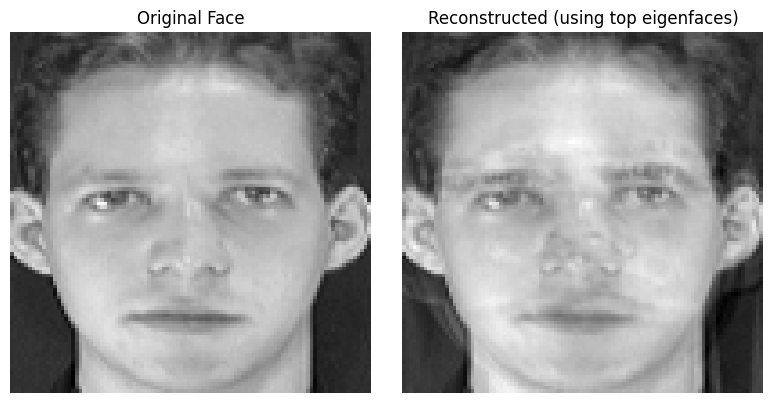

In [6]:
weights = centered_data[0] @ top_eigenfaces  # projection
reconstructed = mean_face + weights @ top_eigenfaces.T

# weights - Finds how strongly each eigenface contributes to this face (projection)
# project the first image into the eigenface space (find its weights)
# weights = how much of each eigenface is present in this face
# centered_data[0] → This is one flattened face (say the first one) after mean subtraction-Shape: (10000,)
# top_eigenfaces → Contains the top eigenvectors (the “basis” of our face space).
# Shape: (10000, k) where k = number of eigenfaces (say 6)
# top_eigenfaces - Columns are eigenfaces
# (1 × 10000)  @  (10000 × k)  =  (1 × k) no.of columns in first equal to the no. of rows in the second

#  reconstructed = the face that can be built using the selected eigenfaces
# You’re reversing the projection process
# top_eigenfaces.T - (k × 10000) it transpose for multiplication
# top_eigenfaces.T - Transpose (flip rows ↔ columns) Rows become eigenfaces
# (1 × k)  @  (k × 10000) no.of columns in first equal to the no. of rows in the second

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(images[0], cmap='gray')
plt.title("Original Face")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(reconstructed.reshape(100, 100), cmap='gray')
plt.title("Reconstructed (using top eigenfaces)")
plt.axis('off')

plt.tight_layout()
plt.show()
